In [37]:
import numpy as np
from itertools import product
from dataclasses import dataclass
import matplotlib.pyplot as plt
import math

In [3]:
significant_figures = 4
_float_tolerance = 5 * (10 ** -(significant_figures +1))

def _do_float_division_with_tolerance(divisor, dividend,):
    if _do_float_eq_with_tolerance(divisor, dividend):
        return int(1)
    
    quotient = np.true_divide(divisor, dividend)
    return quotient

def _do_float_subtraction_with_tolerance(minuend, subtrahend,):
    difference = np.subtract(minuend, subtrahend)

    if _do_float_le_with_tolerance(difference + _float_tolerance, int(difference)) and _do_float_ge_with_tolerance(difference - _float_tolerance, int(difference)):
        return int(difference)

    return difference

vectorized_float_division_with_tolerance = np.vectorize(_do_float_division_with_tolerance)
vectorized_float_subtraction_with_tolerance = np.vectorize(_do_float_subtraction_with_tolerance)

def _do_float_eq_with_tolerance(given, to_compare, sig_figs=significant_figures):
    tolerance = 5 * (10 ** -(significant_figures +1))
    return round(given - tolerance, sig_figs) <= to_compare and round(given + tolerance, sig_figs) >= to_compare

def _do_float_gt_with_tolerance(given, to_compare, sig_figs=significant_figures):
    tolerance = 5 * (10 ** -(significant_figures +1))
    return round(given - tolerance, sig_figs) > to_compare and round(given + tolerance, sig_figs) > to_compare

def _do_float_lt_with_tolerance(given, to_compare, sig_figs=significant_figures):
    tolerance = 5 * (10 ** -(significant_figures +1))
    return round(given - tolerance, sig_figs) < to_compare and round(given + tolerance, sig_figs) < to_compare

def _do_float_ge_with_tolerance(given, to_compare, sig_figs=significant_figures):
    return _do_float_gt_with_tolerance(given, to_compare, sig_figs) or _do_float_eq_with_tolerance(given, to_compare, sig_figs)

def _do_float_le_with_tolerance(given, to_compare, sig_figs=significant_figures):
    return _do_float_lt_with_tolerance(given, to_compare, sig_figs) or _do_float_eq_with_tolerance(given, to_compare, sig_figs)

vectorized_float_eq_with_tolerance = np.vectorize(_do_float_eq_with_tolerance)
vectorized_float_gt_with_tolerance = np.vectorize(_do_float_gt_with_tolerance)
vectorized_float_lt_with_tolerance = np.vectorize(_do_float_lt_with_tolerance)
vectorized_float_ge_with_tolerance = np.vectorize(_do_float_ge_with_tolerance)
vectorized_float_le_with_tolerance = np.vectorize(_do_float_le_with_tolerance)

In [4]:
M=1

def get_curvature_factor(r_coordinate):

    if r_coordinate == 0:
        return np.inf

    schwarzschild_radius = 2*M
    r_coordinate_scaled_by_M = np.multiply(r_coordinate, M)

    quotient = vectorized_float_division_with_tolerance(divisor=schwarzschild_radius, dividend=r_coordinate_scaled_by_M)
    difference = vectorized_float_subtraction_with_tolerance(minuend=np.ones(np.shape(r_coordinate)), subtrahend=quotient)

    if difference > 0:
        return np.sqrt(difference)
    else:
        return -np.sqrt(np.abs(difference))

## Lattice

### Dimensions dataclass

In [5]:
@dataclass(frozen=True)
class Dimensions:
    left: int
    right: int
    top: int
    bottom: int
    resolution: float

@dataclass(frozen=True)
class PolarDimensions:
    inner_r: int
    outer_r: int
    r_resolution: float
    phi_resolution: float
    phi_sig_figs: int

### Coordinate and Coordinate System helper dataclasses

#### Cartesian

In [6]:
@dataclass(frozen=True)
class Cartesian:
    x: int
    y: int

    def __eq__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_eq_with_tolerance(self.x, other.x)
            y_match = vectorized_float_eq_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_ge_with_tolerance(self.x, other.x)
            y_match = vectorized_float_ge_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_le_with_tolerance(self.x, other.x)
            y_match = vectorized_float_le_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    ## TODO: need to consider case where x == x, y > y
    def __gt__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_gt_with_tolerance(self.x, other.x)
            y_match = vectorized_float_gt_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_lt_with_tolerance(self.x, other.x)
            y_match = vectorized_float_lt_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

#### Polar

In [7]:
@dataclass(frozen=True)
class Polar:
    r: int
    phi: float

    def __eq__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_eq_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_eq_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_ge_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_ge_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_le_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_le_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __gt__(self, other):
        if isinstance(other, type(self)):
            if vectorized_float_eq_with_tolerance(self.r, other.r):
                return vectorized_float_gt_with_tolerance(self.phi, other.phi)

            r_match = vectorized_float_gt_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_gt_with_tolerance(self.phi, other.phi)

            return r_match and phi_match
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            if vectorized_float_eq_with_tolerance(self.r, other.r):
                return vectorized_float_lt_with_tolerance(self.phi, other.phi) 

            r_match = vectorized_float_lt_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_lt_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

#### Coordinates

In [8]:
class Coordinate:
    def __init__(self, q1: int, q2: int, is_cartesian=True,):
        if is_cartesian:
            self.cartesian = Cartesian(q1, q2)
            self.polar = Coordinate.convert_from_cartesian(self.cartesian)
        else:
            if _do_float_lt_with_tolerance(q2, 0):
                q2 = _do_float_subtraction_with_tolerance(q2, -2*np.pi)
            elif _do_float_gt_with_tolerance(q2, 2*np.pi):
                q2 = _do_float_subtraction_with_tolerance(q2, 2*np.pi)

            self.polar = Polar(q1, q2)
            self.cartesian = Coordinate.convert_from_polar(self.polar)
        self.curvature = get_curvature_factor(self.polar.r)
    
    def convert_from_polar(coordinates_to_convert: Polar):
        x_coordinate = np.multiply(coordinates_to_convert.r, np.cos(coordinates_to_convert.phi))
        y_coordinate = np.multiply(coordinates_to_convert.r, np.sin(coordinates_to_convert.phi))

        return Cartesian(x=x_coordinate, y=y_coordinate)

    def convert_from_cartesian(coordinates_to_convert: Cartesian):
        r_coordinate = np.sqrt(np.power(coordinates_to_convert.x , 2) + np.power(coordinates_to_convert.y , 2))

        if r_coordinate == 0:
            return Polar(r=r_coordinate, phi=0)
        
        phi_coordinate = np.arctan2(coordinates_to_convert.y, coordinates_to_convert.x)

        if _do_float_lt_with_tolerance(phi_coordinate, 0):
            phi_coordinate = _do_float_subtraction_with_tolerance(phi_coordinate, -2*np.pi)

        return Polar(r=r_coordinate, phi=phi_coordinate)
    
    def __eq__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian == other.cartesian and self.polar == other.polar
        else:
            return NotImplemented

    def __gt__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian > other.cartesian and self.polar > other.polar
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
           return self.cartesian >= other.cartesian and self.polar >= other.polar
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian < other.cartesian and self.polar < other.polar
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
           return self.cartesian <= other.cartesian and self.polar <= other.polar
        else:
            return NotImplemented


### The Latticework Class

#### Creation

In [246]:
class Latticework:

    def __init__(self, /, dimensions: Dimensions=None, polar_dimensions: PolarDimensions=None):
        self.mesh = None
        self.cartesian_dimensions = None
        self.polar_dimensions = None

        if not dimensions is  None:
            self.cartesian_dimensions = dimensions
            self._build_cartesian_grid()
        if not polar_dimensions is None:
            self.polar_dimensions = polar_dimensions
            self._build_polar_grid()

        self._build_dictionary_of_shells()
    
    def _build_cartesian_grid(self):
        self.vertices = { }

        number_of_x_vertices = int((np.abs(self.cartesian_dimensions.left)+np.abs(self.cartesian_dimensions.right))/self.cartesian_dimensions.resolution) +1
        number_of_y_vertices = int(((np.abs(self.cartesian_dimensions.bottom)+np.abs(self.cartesian_dimensions.top)))/self.cartesian_dimensions.resolution) +1

        for x in np.linspace(start=self.cartesian_dimensions.left, stop=self.cartesian_dimensions.right, num=number_of_x_vertices, endpoint=True):
            for y in np.linspace(start=self.cartesian_dimensions.bottom, stop=self.cartesian_dimensions.top, num=number_of_y_vertices, endpoint=True):
                self.vertices.update({(x, y) : Coordinate(q1=x, q2=y)})
        self._build_meshgrid()

    def _build_polar_grid(self):
        self.vertices = { }

        number_of_r_vertices = int((np.abs(self.polar_dimensions.inner_r)+np.abs(self.polar_dimensions.outer_r))/self.polar_dimensions.r_resolution) +1
        number_of_phi_vertices = int((2*np.pi)/self.polar_dimensions.phi_resolution)

        for r in np.linspace(start=self.polar_dimensions.inner_r, stop=self.polar_dimensions.outer_r, num=number_of_r_vertices, endpoint=True):
            for phi in np.linspace(start=0, stop=2*np.pi, num=number_of_phi_vertices, endpoint=True):
                self.vertices.update({(r, round(phi, self.polar_dimensions.phi_sig_figs)) : Coordinate(q1=r, q2=round(phi, self.polar_dimensions.phi_sig_figs), is_cartesian=False)})
        self._build_meshgrid()
    
    def get_coordinates_of_constant_r(self, constant_r, ascending=True, complete_loop=True) -> list():
        shell_of_constant_r = self.shells["r"][constant_r].copy()
        if not ascending:
            shell_of_constant_r.sort(reverse= not ascending, key=lambda x: x.polar.phi)
        if complete_loop:
            shell_of_constant_r.append(shell_of_constant_r[0])
        return shell_of_constant_r
    
    def get_coordinates_of_constant_phi(self, constant_phi, ascending=True) -> list():
        shell_of_constant_phi = self.shells["phi"][constant_phi].copy()
        if not ascending:
            shell_of_constant_phi.sort(reverse= not ascending, key=lambda x: x.polar.r)

        return shell_of_constant_phi

    def _build_dictionary_of_shells(self):
        self.shells = { 
            "r" : { }, 
            "phi" : { }, 
            }

        sorted_vertices = list(self.vertices.values())
        sorted_vertices.sort(key=lambda x: x.polar.r)

        for coordinate in sorted_vertices:
            if coordinate.polar.r not in self.shells["r"].keys():
                self.shells["r"].update({coordinate.polar.r : [ coordinate, ]})
            else:
                self.shells["r"][coordinate.polar.r].append(coordinate)
        
        sorted_vertices.sort(key=lambda x: x.polar.phi)
        for coordinate in sorted_vertices:
            if coordinate.polar.phi not in self.shells["phi"].keys():
                self.shells["phi"].update({coordinate.polar.phi : [ coordinate, ]})
            else:
                self.shells["phi"][coordinate.polar.phi].append(coordinate)
            
        for r in self.shells["r"].keys():
            self.shells["r"][r].sort(key=lambda x: x.polar.phi)
        
        for phi in self.shells["phi"].keys():
            self.shells["phi"][phi].sort(key=lambda x: x.polar.r)
    
    def get_coordinate_at_edge(self):
        return self.shells["r"][self.dimensions.right][0]

    def _build_meshgrid(self):
        if not self.mesh is None:
            return

        if self.polar_dimensions is None:
            number_of_X_samples = int((np.abs(self.cartesian_dimensions.left)+np.abs(self.cartesian_dimensions.right))/self.cartesian_dimensions.resolution) +1
            number_of_Y_samples = int((np.abs(self.cartesian_dimensions.bottom)+np.abs(self.cartesian_dimensions.top))/self.cartesian_dimensions.resolution) +1

            X = np.linspace(start=self.cartesian_dimensions.left, stop=self.cartesian_dimensions.right, num=number_of_X_samples, endpoint=True)
            Y = np.linspace(start=self.cartesian_dimensions.bottom, stop=self.cartesian_dimensions.top, num=number_of_Y_samples, endpoint=True)
            Z = np.zeros((len(X), len(Y)))

            for i, (x,y) in enumerate(product(X,Y)):
                if _do_float_gt_with_tolerance(self.vertices[x,y].polar.r, 2*M + self.cartesian_dimensions.resolution, sig_figs=1):
                    Z[np.unravel_index(i, (len(X), len(Y)))] = np.true_divide(1, self.vertices[x,y].curvature)

            z_max_index = np.unravel_index(np.argmax(Z), Z.shape)
            Z = np.where(Z == 0, Z[z_max_index]+1, Z)

            X, Y = np.meshgrid(X, Y)

            self.mesh = (X, Y, Z)
            return
        
        if self.cartesian_dimensions is None:
            number_of_r_vertices = int((np.abs(self.polar_dimensions.inner_r)+np.abs(self.polar_dimensions.outer_r))/self.polar_dimensions.r_resolution) +1
            number_of_phi_vertices = int((2*np.pi)/self.polar_dimensions.phi_resolution)

            R = np.linspace(start=self.polar_dimensions.inner_r, stop=self.polar_dimensions.outer_r, num=number_of_r_vertices, endpoint=True)
            Phi = np.linspace(start=0, stop=2*np.pi, num=number_of_phi_vertices, endpoint=True)

            R, Phi = np.meshgrid(R, Phi)
            X, Y = R*np.cos(Phi), R*np.sin(Phi)

            Z = np.zeros(X.shape)
            offset = self.polar_dimensions.r_resolution/2 if self.polar_dimensions.r_resolution >= 1 else self.polar_dimensions.r_resolution

            it = np.nditer([X, Y], flags=['multi_index'])
            for x, y, in it:
                ix, iy = it.multi_index
                r = round(math.sqrt(math.pow(x,2) + math.pow(y,2))*M, int(math.fabs(math.log(self.polar_dimensions.r_resolution))))
                
                if r <= 2.0*M:
                    Z[ix, iy] = 1/get_curvature_factor(2*M+offset/2)
                else:
                    Z[ix, iy] = 1/get_curvature_factor(r)
                
            self.mesh = (X, Y, Z)
            return

In [245]:
offset = lattice.polar_dimensions.r_resolution/2 if lattice.polar_dimensions.r_resolution >= 1 else lattice.polar_dimensions.r_resolution
print(2*M+(offset/2))
print(1/get_curvature_factor(2*M+(offset/2)))
print(1/get_curvature_factor(2+2*lattice.polar_dimensions.r_resolution))

2.05
6.403124237432861
3.3166247903553994


## Mesh

In [237]:
def draw_layout_3D(lattice, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot(projection='3d')

    X, Y, Z = lattice.mesh
    colors = [ ]

    it = np.nditer([X, Y], flags=['multi_index'])

    for x, y, in it:
        colors.append((0.25, 0.25, 0.25, 0.5))

    ax.plot_wireframe(X, Y, Z, colors=colors)

    ax.scatter3D(X, Y, Z)

    ax.set_xlim( (-lattice.polar_dimensions.outer_r, lattice.polar_dimensions.outer_r) )
    ax.set_xticks([x for x in range(-lattice.polar_dimensions.outer_r, lattice.polar_dimensions.outer_r + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(-lattice.polar_dimensions.outer_r, lattice.polar_dimensions.outer_r + 1)])

    ax.set_ylim( (-lattice.polar_dimensions.outer_r, lattice.polar_dimensions.outer_r) )
    ax.set_yticks([y for y in range(-lattice.polar_dimensions.outer_r, lattice.polar_dimensions.outer_r + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(-lattice.polar_dimensions.outer_r, lattice.polar_dimensions.outer_r + 1)])

    z_max_index = np.unravel_index(np.argmax(Z), (Z).shape)

    ax.set_zlim( bottom=Z[z_max_index]+1, top=1,)

    return fig, ax

### Plot

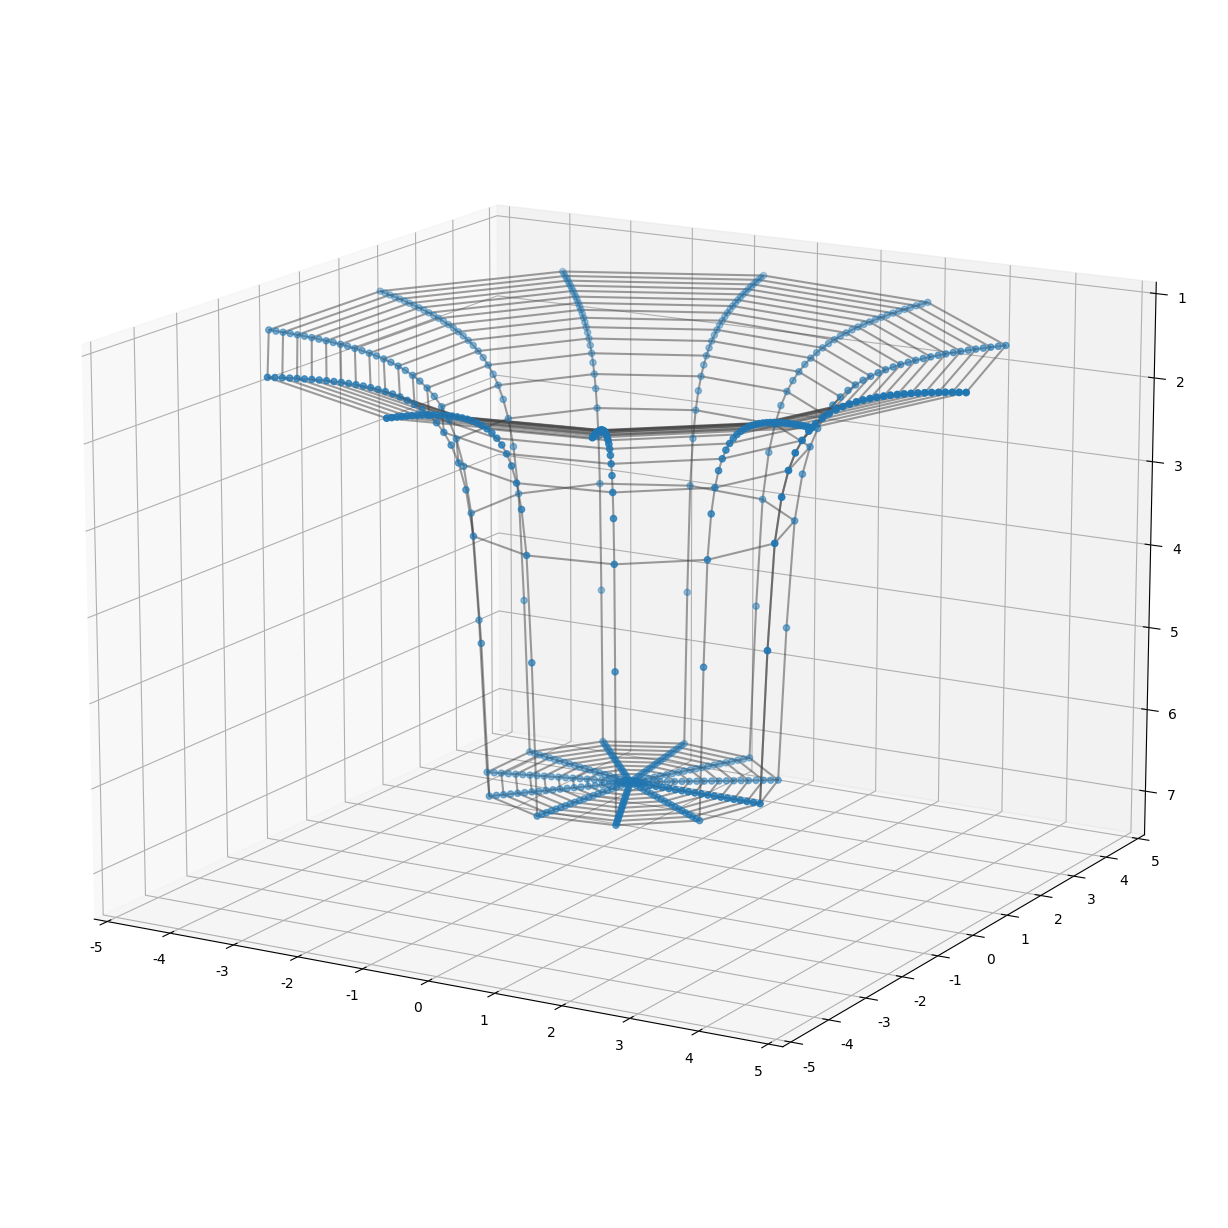

In [247]:
lattice_dimensions = PolarDimensions(
    inner_r=0,
    outer_r=5,
    r_resolution=0.1,
    phi_resolution=0.5,
    phi_sig_figs=2
)
lattice = Latticework(
    polar_dimensions=lattice_dimensions
)

print("\n\n")

fig, ax = draw_layout_3D(lattice=lattice)
ax.view_init(15,-60)

In [74]:
print(lattice.get_coordinate_at_edge().cartesian.x)

5.0
